
# KDAG SELECTION ROUND 2 TASK 2
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Problem Statement :

You've got a simulated night-time satellite image, a grid of 64x64 squares with white dots representing places where there's light. The Task is to create an algorithm that can find these dots and locate the cities on the 64x64 grid by clustering them.
After identifying cities through clustering, calculate the distances between them using the center point of cities. Present the distances in a clear format, such as a table.

<hr style="margin-bottom:40px">


### Importing Libraries 



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
from tabulate import tabulate


#### Open Images using pillow

convert('L') is used to store it in greyscale format, where only one channel is present.

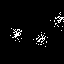

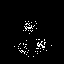

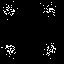

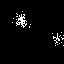

In [6]:
img1 = Image.open("1.png").convert('L')
img2= Image.open("2.png").convert('L')
img3= Image.open("3.png").convert('L')
img4= Image.open("4.png").convert('L')
display(img1,img2,img3,img4)

#### Using numpy to store the images as a 2-D arrays
the length and width of the array is thge pixel length and width of the image.

In [8]:
img1_array=np.array(img1)

print(img1_array.shape)
img1_array


(64, 64)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
#for the remaining images too
img2_array=np.array(img2)
img3_array=np.array(img3)
img4_array=np.array(img4)


#### Plotting Function to identify white spots
In the 2-D array, 0 represents pitch black and 255 represents pure white. 

In [11]:

def plotting(img_array):
    img_array = img_array.T
    x=[]
    y=[]
    #x and y will store x and y coordinates of the points which are non black.
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            if img_array[i][j] > 0 :
                x.append(i)
                y.append(j)
                #print(i,j)

    return(x,y)            

#### Plotting the points in a scatter plot

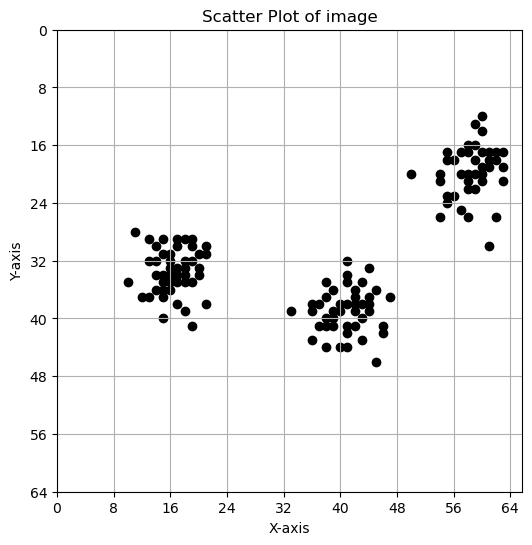

In [13]:
def scatter_plot(img_array):
    x,y = plotting(img_array)
    plt.figure(figsize=(6, 6))
    plt.scatter(x,y,plt.gca().invert_yaxis(),color='#000000')
    
    """Since the scatter function from matplotlib reads the plot from top down of the y axis
    it is important totranspose the 2d array and inverse the y axis to get accurate representation 
    for the image and plot shown. Calculations within the plot remains unaffected."""
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatter Plot of image')
    plt.yticks(range(0,65,8))
    plt.xticks(range(0,65,8))
    
    plt.grid(True)
    plt.show()
    
    
scatter_plot(img1_array)    
    

##### for other images also.

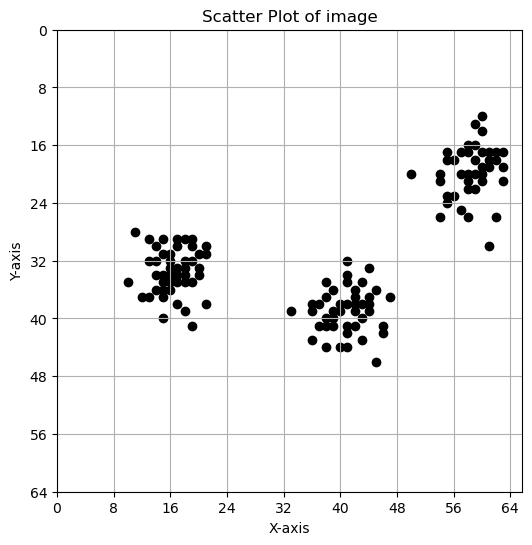

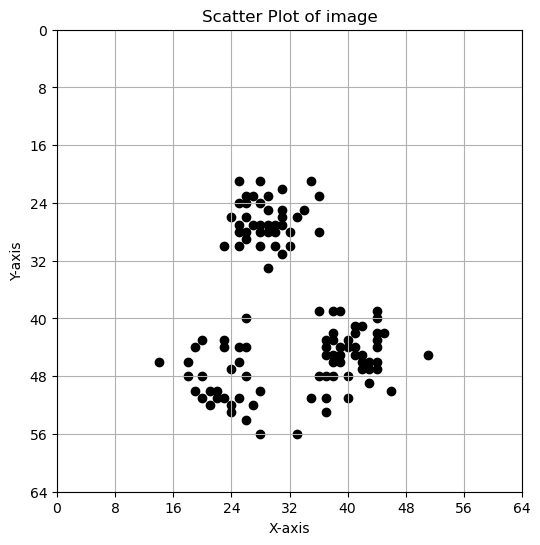

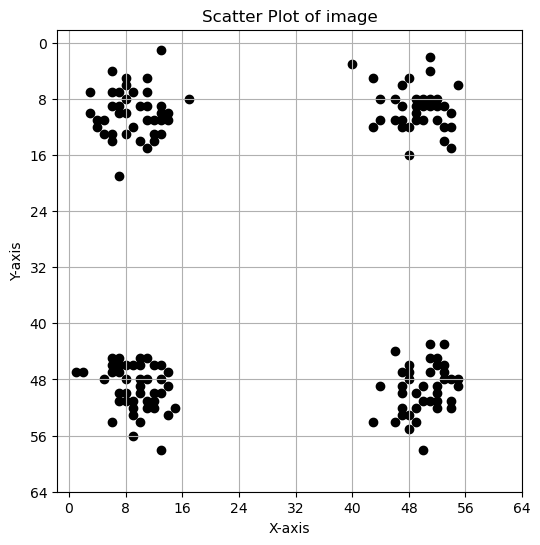

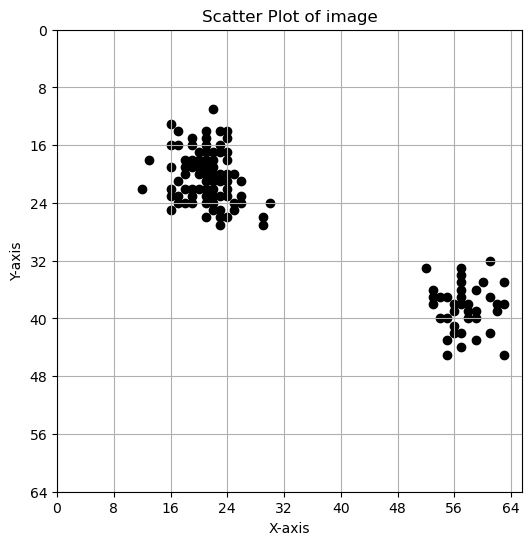

In [15]:
scatter_plot(img1_array) 
scatter_plot(img2_array)
scatter_plot(img3_array) 
scatter_plot(img4_array) 

# Kmeans Algoritm
K-means clustering is a popular unsupervised machine learning algorithm that groups data points into a predefined number of clusters (k).
##### Here's how it works :
Step 1 : Initialize centroids: We specify the number of clusters (k). The algorithm randomly selects k data points as initial cluster centers, called centroids.

Step 2 : Assigning points to clusters: Each data point is assigned to the closest centroid based on a distance metric(Euclidean distance).

Step 3 : Recompute centroids: The centroids are recalculated as the mean of the data points assigned to each cluster.

Step 4 : Repeat steps 2 and 3: Steps 2 and 3 are repeated until the centroids no longer significantly change between iterations, indicating the clusters have been finalised.

<hr style="margin-bottom:40px">


#### Storing the coordinates of white points in two lists

In [18]:

x_data1,y_data1 = plotting(img1_array)
x_data2,y_data2 = plotting(img2_array)
x_data3,y_data3 = plotting(img3_array)
x_data4,y_data4 = plotting(img4_array)

#colour map to be used in differentiating clusters.
colmap = ['white','red','green','blue','orange','black','pink','brown','teal','violet','yellow','cyan']
#storing global range of k in a list
global k_range
k_range = list(range(1,10))


#### Assignment Function:
Assigns the points to closest centroids and stores the data in a dataframe.

In [20]:
#assignment

def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] =(
            np.sqrt(
                (df['x']-centroids[i][0])**2 + (df['y']-centroids[i][1])**2
                #calculating eucledian distance between white spot coords and centroids
            )
        )
        
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    #storing the distance for each centroid in a list
    df['closest']=df.loc[:, centroid_distance_cols].idxmin(axis=1)
    #finding minumum distance and assigning the point with that cluster.
    df['closest']=df['closest'].map(lambda x : int(x.lstrip('distance_from_')))
    #extracts the key of centroid by string manipulation and storing it in the column 'closest'
    df['color']=df['closest'].map(lambda x : colmap[x])
    #choosing color for the points of a cluster with colmap defined earlier
    return df
                     

### K-Means Function
Shows the finalised clusters as output.Working explained in comments.

In [22]:
def kmeans(x,y,k):
    
    df =pd.DataFrame({'x':x,'y':y})
    #making a dataframe using list of x and y coordinates
    np.random.seed(200)
    #to produce same random numbers everytime

    # initialisaion
    
    centroids = {
        i+1 :[np.random.randint(0,64),np.random.randint(1,64)]
        for i in range(k)
    }  
    #centroids are chosen at random
    
    #assignment of points to centroids using assignment function
    df = assignment(df,centroids)
  
    #Updating the centroids by calculating the mean of the coordinate points of a particular cluster
    for i in centroids.keys():
        
        centroids[i][0] = np.mean(df[df['closest']==i]['x'])
        centroids[i][1] = np.mean(df[df['closest']==i]['y'])
    
    
    #Reassigning the data points for the new centroids
    df = assignment(df,centroids)
    
    
    # Running the updation - assignation in a loop till none of the points change clusters
    while True:
        closest_centroids = df['closest'].copy(deep=True)
       
        for i in centroids.keys():
        
            centroids[i][0] = np.mean(df[df['closest']==i]['x'])
            centroids[i][1] = np.mean(df[df['closest']==i]['y'])
        
        df = assignment(df,centroids)

        if closest_centroids.equals(df['closest']):
            break
  

    # Plotting the results:

    fig = plt.figure(figsize=(6,6))
    plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')


    for i in centroids.keys():
        plt.scatter(*centroids[i],color=colmap[i])

    plt.xlim(0,64)
    plt.ylim(0,64)
    plt.show()

    # Showing the distance between clusters in a zero diagonal symmetrical matrix
      
    dict = centroids
    
    #function to find distance
    def distance(x, y):
      return ((dict[x][0] - dict[y][0])**2 + (dict[x][1] - dict[y][1])**2)**0.5
    #empty lists to store columns and indexes
    col = []
    ind = []
    for i in range(len(dict)):
        col.append('from_city_{}'.format(i+1))
        ind.append('Distance_of_city_{}'.format(i+1))

    #finding distance and storing in a matrix
    distance_matrix = [[distance(i, j) for j in dict.keys()] for i in dict.keys()]
    #stroring the distance matrix in a dataframe
    dataf = pd.DataFrame(distance_matrix, columns=col, index=ind)
    
    #prinitng the distances in a tabular format
    print(tabulate(dataf, headers=dataf.columns, tablefmt='fancy_grid'))      

    

## Elbow Method to select optimal value of 'k' 
Plotting the Within Cluster Square Sum(WCSS) value against the probable values of 'k'
to determine the turning point which is the optimal value or 'k'.

WCSS is the sum of squares of all distances between the points and clusters of the particular cluster. 
i.e
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSMyuLZKL2yvDD8-QAs-azQhyrF12aHPTIm5JiJthsF&s">


In [24]:
# square value to be used for calculating wcss
def square(x):
    return x ** 2

#### Function to run K-Means algorithm for each value of 'K':
Function runs k means algorithm taking the coordinates as input and returns the dataframe consisiting the distances and assignment of points to the clusters.


In [26]:
# Working is similar to the kmeans function but it does not plot the graph 
# only returns the dataframe        

def kmeans_elbow(x,y,k):
    df =pd.DataFrame({'x':x,'y':y})
    np.random.seed(200)
    centroids = {
        i+1 :[np.random.randint(0,64),np.random.randint(1,64)]
        for i in range(k)
    }  
    df = assignment(df,centroids)
   
    
    for i in centroids.keys():
        
        centroids[i][0] = np.mean(df[df['closest']==i]['x'])
        centroids[i][1] = np.mean(df[df['closest']==i]['y'])

    df = assignment(df,centroids)
    
    while True:
        closest_centroids = df['closest'].copy(deep=True)
        # centroids = update(centroids)
        for i in centroids.keys():
        
            centroids[i][0] = np.mean(df[df['closest']==i]['x'])
            centroids[i][1] = np.mean(df[df['closest']==i]['y'])
        
        df = assignment(df,centroids)

        if closest_centroids.equals(df['closest']):
            break
    return df


### Elbow Fuction to calculate wcss and plot the graph

In [28]:

def elbow(x,y):
    k_range = list(range(1,10))
    wcss = []
    # empty list to store values of wcss
    
    # running kmeans_elbow for each value of k
    for i in range(1,10):
        temp = kmeans_elbow(x,y,i)
        #storing the dataframe in temp
        
        sum = 0
        #another loop for calculating wcss for each cluster in aparticular 'k'
        for j in range(1,i+1):
            num_col = len(temp.columns)-2
            #accessing the column where the identity of the cluster where the point is assigned to
            condition = temp.iloc[:, num_col] == j
            #condition to find the points which are present in that cluster.
            sum_value = temp[condition].iloc[:, j+1].apply(square).sum()
            #calculating and summing the wcss for each cluster
            sum += sum_value  
        
        #storing the summed value to wcss list.
        wcss.append(sum)
    
    # Plotting the Curve
    plt.plot(k_range,wcss)

    plt.xlabel("Values of K")
    plt.ylabel("Within Cluster Sum of Squares")
    plt.title("Elbow Curve")

    # Displaying the plot
    plt.show()
    


## Plotting the Clusters for all Images

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


#### For Image 1

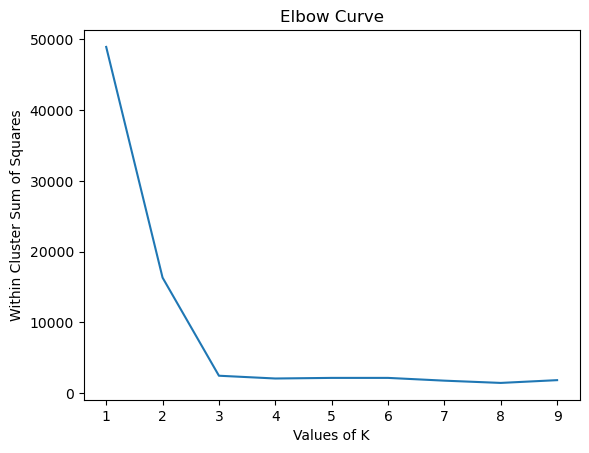

In [31]:
elbow(x_data1,y_data1)

##### we can see that the curve bends sharply at k=3,so that is the optimal value of k

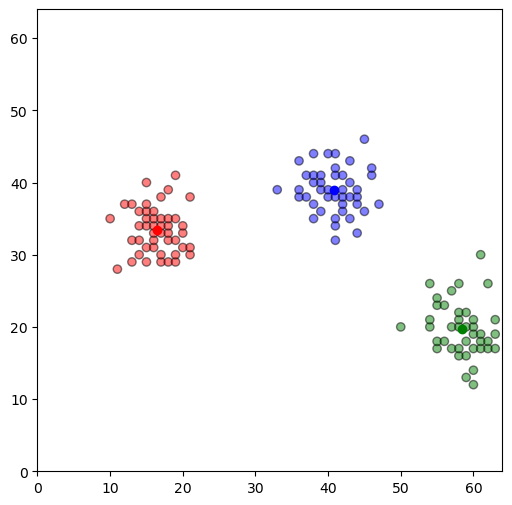

╒════════════════════╤═══════════════╤═══════════════╤═══════════════╕
│                    │   from_city_1 │   from_city_2 │   from_city_3 │
╞════════════════════╪═══════════════╪═══════════════╪═══════════════╡
│ Distance_of_city_1 │        0      │       44.1588 │       24.9697 │
├────────────────────┼───────────────┼───────────────┼───────────────┤
│ Distance_of_city_2 │       44.1588 │        0      │       26.0759 │
├────────────────────┼───────────────┼───────────────┼───────────────┤
│ Distance_of_city_3 │       24.9697 │       26.0759 │        0      │
╘════════════════════╧═══════════════╧═══════════════╧═══════════════╛


In [33]:
kmeans(x_data1,y_data1,3)

#### For other images

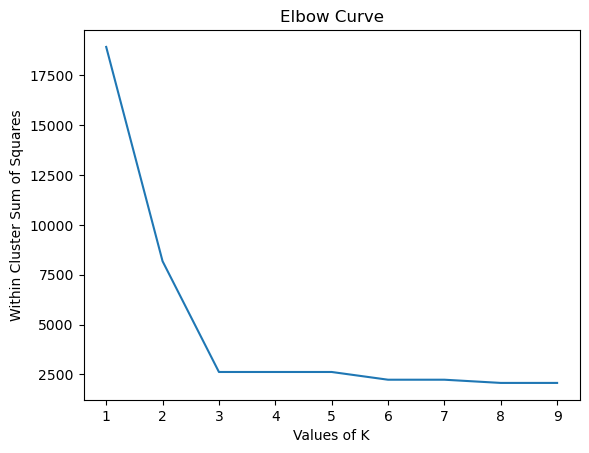

In [35]:
elbow(x_data2,y_data2)

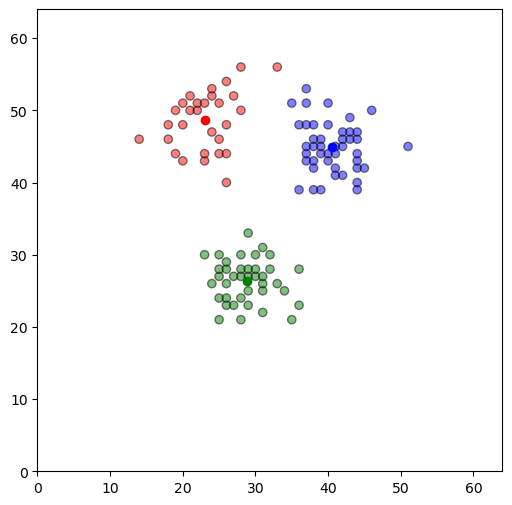

╒════════════════════╤═══════════════╤═══════════════╤═══════════════╕
│                    │   from_city_1 │   from_city_2 │   from_city_3 │
╞════════════════════╪═══════════════╪═══════════════╪═══════════════╡
│ Distance_of_city_1 │        0      │       22.9593 │       17.8325 │
├────────────────────┼───────────────┼───────────────┼───────────────┤
│ Distance_of_city_2 │       22.9593 │        0      │       21.9233 │
├────────────────────┼───────────────┼───────────────┼───────────────┤
│ Distance_of_city_3 │       17.8325 │       21.9233 │        0      │
╘════════════════════╧═══════════════╧═══════════════╧═══════════════╛


In [36]:
kmeans(x_data2,y_data2,3)

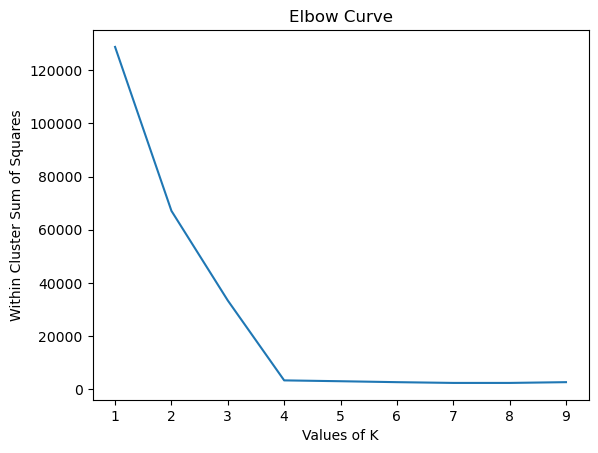

In [37]:
elbow(x_data3,y_data3)

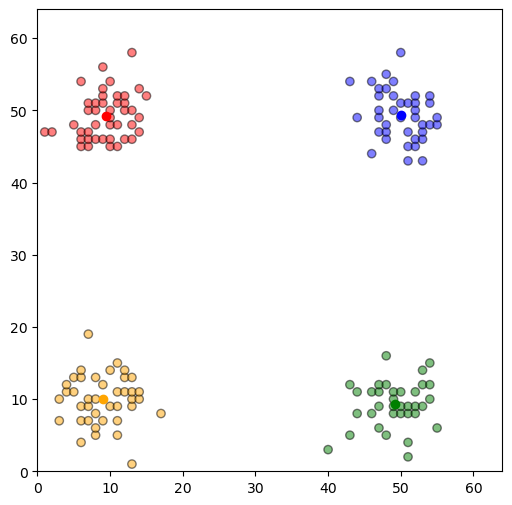

╒════════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│                    │   from_city_1 │   from_city_2 │   from_city_3 │   from_city_4 │
╞════════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│ Distance_of_city_1 │        0      │       56.34   │       40.6074 │       39.2613 │
├────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ Distance_of_city_2 │       56.34   │        0      │       40.1372 │       40.1238 │
├────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ Distance_of_city_3 │       40.6074 │       40.1372 │        0      │       56.8871 │
├────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ Distance_of_city_4 │       39.2613 │       40.1238 │       56.8871 │        0      │
╘════════════════════╧═══════════════╧═══════════════╧═══════════════╧═══════════════╛


In [38]:
kmeans(x_data3,y_data3,4)

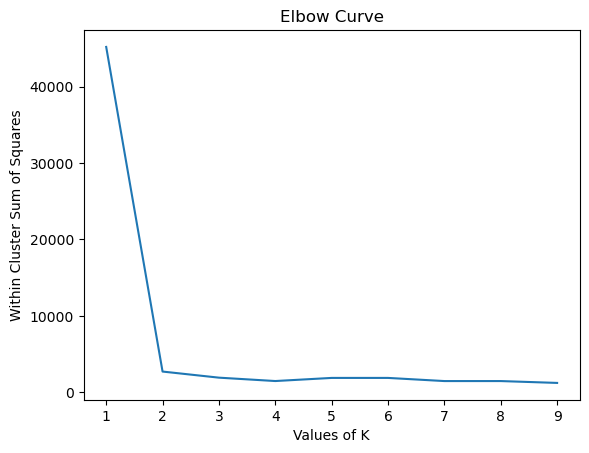

In [39]:
elbow(x_data4,y_data4)

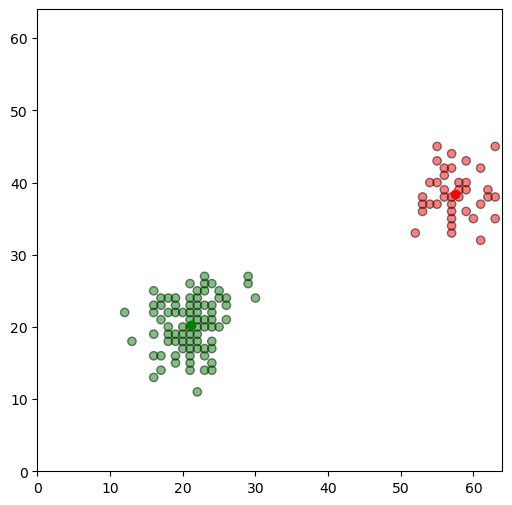

╒════════════════════╤═══════════════╤═══════════════╕
│                    │   from_city_1 │   from_city_2 │
╞════════════════════╪═══════════════╪═══════════════╡
│ Distance_of_city_1 │        0      │       40.6815 │
├────────────────────┼───────────────┼───────────────┤
│ Distance_of_city_2 │       40.6815 │        0      │
╘════════════════════╧═══════════════╧═══════════════╛


In [40]:
kmeans(x_data4,y_data4,2)